In [5]:
import os
import base64
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/karan.verma")
from verification_guardrails import get_type_of_text 

In [3]:
ipaddr = 'speak2recharge.mysql.database.azure.com'
db_name = 'speech_uat'
passwd = 'S2RPass7'
userid = 'myadmin@speak2recharge'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()

In [4]:
tables = pd.read_sql("show tables;", db_connection)
tables


,Tables_in_speech_uat
0,b'config'
1,b'data'
2,b'data_assamese'
3,b'data_bengali'
4,b'data_gujarati'
...,...
83,b'user_punjabi'
84,b'user_tamil'
85,b'user_telugu'
86,b'user_urdu'


In [4]:
count_temporary = pd.read_sql("select count(*) from s2r_vs_grocery_combined_30092020", db_connection)
count_temporary

,count(*)
0,2290120


# Analyising Data From S2R

In [4]:
data_from_s2r = pd.read_sql("select * from s2r_vs_grocery_combined_30092020;", db_connection)
data_from_s2r['utf_text_decoded'] = data_from_s2r['utf_text'].apply(base64.urlsafe_b64decode).str.decode('utf8')

## Dumping Data to intermediate File

In [3]:
data_from_s2r.to_csv('/home/sanyam.sood/jupyter_lab_files/s2r_file.csv')


NameError: name 'data_from_s2r' is not defined

In [1]:
import pandas as pd
data_from_s2r = pd.read_csv('/home/sanyam.sood/jupyter_lab_files/s2r_file.csv')


In [2]:
data_from_s2r['word_len'] = data_from_s2r['utf_text_decoded'].str.split().apply(len)
# data_from_s2r.head()

In [3]:
data_from_s2r.describe()

,Unnamed: 0,id,user_id,assigned,tag,flag_decode,hash,verified_time,upload_time,uploaded,verified,synced,last_modifed,length,word_len
count,2.290120e+06,2.290120e+06,2.290120e+06,2290120.0,2.290120e+06,2290120.0,2290120.0,0.0,2290120.0,2290120.0,2290120.0,2.290120e+06,0.0,2290120.0,2.290120e+06
mean,1.145060e+06,2.355756e+07,2.089056e+05,1.0,4.512596e+01,0.0,9.0,NaN,0.0,1.0,20.0,9.945309e-01,NaN,0.0,5.706867e+00
std,6.611008e+05,1.551490e+06,2.132748e+04,0.0,6.359106e+00,0.0,0.0,NaN,0.0,0.0,0.0,7.375118e-02,NaN,0.0,3.312782e+00
min,0.000000e+00,1.772072e+07,1.161800e+04,1.0,3.700000e+01,0.0,9.0,NaN,0.0,1.0,20.0,0.000000e+00,NaN,0.0,1.000000e+00
25%,5.725298e+05,2.307041e+07,2.071550e+05,1.0,3.900000e+01,0.0,9.0,NaN,0.0,1.0,20.0,1.000000e+00,NaN,0.0,3.000000e+00
50%,1.145060e+06,2.389660e+07,2.145980e+05,1.0,3.900000e+01,0.0,9.0,NaN,0.0,1.0,20.0,1.000000e+00,NaN,0.0,5.000000e+00
75%,1.717589e+06,2.469568e+07,2.191790e+05,1.0,5.200000e+01,0.0,9.0,NaN,0.0,1.0,20.0,1.000000e+00,NaN,0.0,8.000000e+00
max,2.290119e+06,2.557554e+07,2.283950e+05,1.0,5.200000e+01,0.0,9.0,NaN,0.0,1.0,20.0,1.000000e+00,NaN,0.0,3.100000e+01


# Plot for sample size 10K

In [8]:
data_from_s2r_word_1 = data_from_s2r['word_len'].sample(n=10000, random_state=1)
data_from_s2r_word_2 = data_from_s2r['word_len'].sample(n=10000, random_state=2)
data_from_s2r_word_3 = data_from_s2r['word_len'].sample(n=10000, random_state=3)
data_from_s2r_word_4 = data_from_s2r['word_len'].sample(n=10000, random_state=4)
data_from_s2r_word_5 = data_from_s2r['word_len'].sample(n=10000, random_state=5)
data_from_s2r_word_6 = data_from_s2r['word_len'].sample(n=10000, random_state=6)
data_from_s2r_word_7 = data_from_s2r['word_len'].sample(n=10000, random_state=7)
data_from_s2r_word_8 = data_from_s2r['word_len'].sample(n=10000, random_state=8)
data_from_s2r_word_9 = data_from_s2r['word_len'].sample(n=10000, random_state=9)

<ipython-input-11-9f235287cef6>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=10.0)


<AxesSubplot:xlabel='word_len', ylabel='Count'>

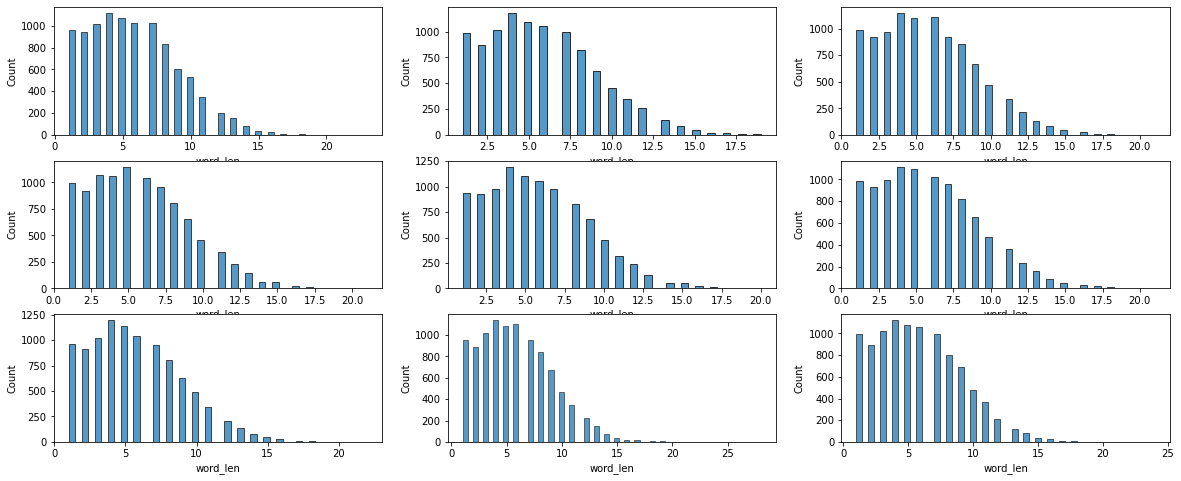

In [11]:
fig, axs = plt.subplots(3,3)
fig.tight_layout(pad=10.0)
fig.set_figheight(8)
fig.set_figwidth(20)

sns.histplot(data_from_s2r_word_1, ax =axs[0][0])
sns.histplot(data_from_s2r_word_2, ax =axs[0][1])
sns.histplot(data_from_s2r_word_3, ax =axs[0][2])
sns.histplot(data_from_s2r_word_4, ax =axs[1][0])
sns.histplot(data_from_s2r_word_5, ax =axs[1][1])
sns.histplot(data_from_s2r_word_6, ax =axs[1][2])
sns.histplot(data_from_s2r_word_7, ax =axs[2][0])
sns.histplot(data_from_s2r_word_8, ax =axs[2][1])
sns.histplot(data_from_s2r_word_9, ax =axs[2][2])


# Plot for sample size 25K

In [ ]:
data_from_s2r_word_1 = data_from_s2r['word_len'].sample(n=25000, random_state=1)
data_from_s2r_word_2 = data_from_s2r['word_len'].sample(n=25000, random_state=2)
data_from_s2r_word_3 = data_from_s2r['word_len'].sample(n=25000, random_state=3)
data_from_s2r_word_4 = data_from_s2r['word_len'].sample(n=25000, random_state=4)
data_from_s2r_word_5 = data_from_s2r['word_len'].sample(n=25000, random_state=5)
data_from_s2r_word_6 = data_from_s2r['word_len'].sample(n=25000, random_state=6)
data_from_s2r_word_7 = data_from_s2r['word_len'].sample(n=25000, random_state=7)
data_from_s2r_word_8 = data_from_s2r['word_len'].sample(n=25000, random_state=8)
data_from_s2r_word_9 = data_from_s2r['word_len'].sample(n=25000, random_state=9)

<ipython-input-13-9f235287cef6>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=10.0)


<AxesSubplot:xlabel='word_len', ylabel='Count'>

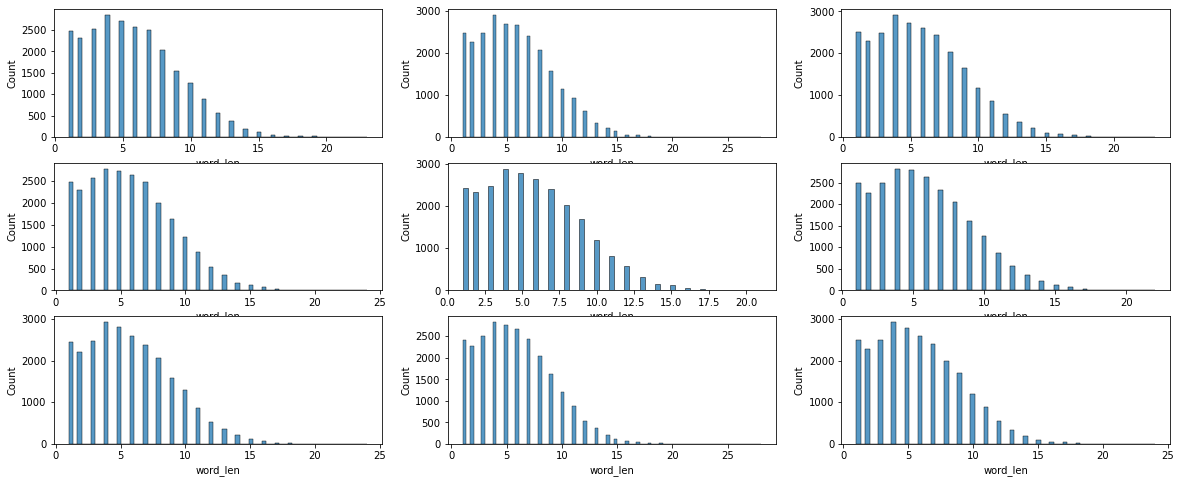

In [13]:
fig, axs = plt.subplots(3,3)
fig.tight_layout(pad=10.0)
fig.set_figheight(8)
fig.set_figwidth(20)

sns.histplot(data_from_s2r_word_1, ax =axs[0][0])
sns.histplot(data_from_s2r_word_2, ax =axs[0][1])
sns.histplot(data_from_s2r_word_3, ax =axs[0][2])
sns.histplot(data_from_s2r_word_4, ax =axs[1][0])
sns.histplot(data_from_s2r_word_5, ax =axs[1][1])
sns.histplot(data_from_s2r_word_6, ax =axs[1][2])
sns.histplot(data_from_s2r_word_7, ax =axs[2][0])
sns.histplot(data_from_s2r_word_8, ax =axs[2][1])
sns.histplot(data_from_s2r_word_9, ax =axs[2][2])


# Plot for Sample Size 100k

In [16]:
data_from_s2r_word_1 = data_from_s2r['word_len'].sample(n=100000, random_state=1)
data_from_s2r_word_2 = data_from_s2r['word_len'].sample(n=100000, random_state=2)
data_from_s2r_word_3 = data_from_s2r['word_len'].sample(n=100000, random_state=3)
data_from_s2r_word_4 = data_from_s2r['word_len'].sample(n=100000, random_state=4)
data_from_s2r_word_5 = data_from_s2r['word_len'].sample(n=100000, random_state=5)
data_from_s2r_word_6 = data_from_s2r['word_len'].sample(n=100000, random_state=6)
data_from_s2r_word_7 = data_from_s2r['word_len'].sample(n=100000, random_state=7)
data_from_s2r_word_8 = data_from_s2r['word_len'].sample(n=100000, random_state=8)
data_from_s2r_word_9 = data_from_s2r['word_len'].sample(n=100000, random_state=9)

<ipython-input-17-9f235287cef6>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=10.0)


<AxesSubplot:xlabel='word_len', ylabel='Count'>

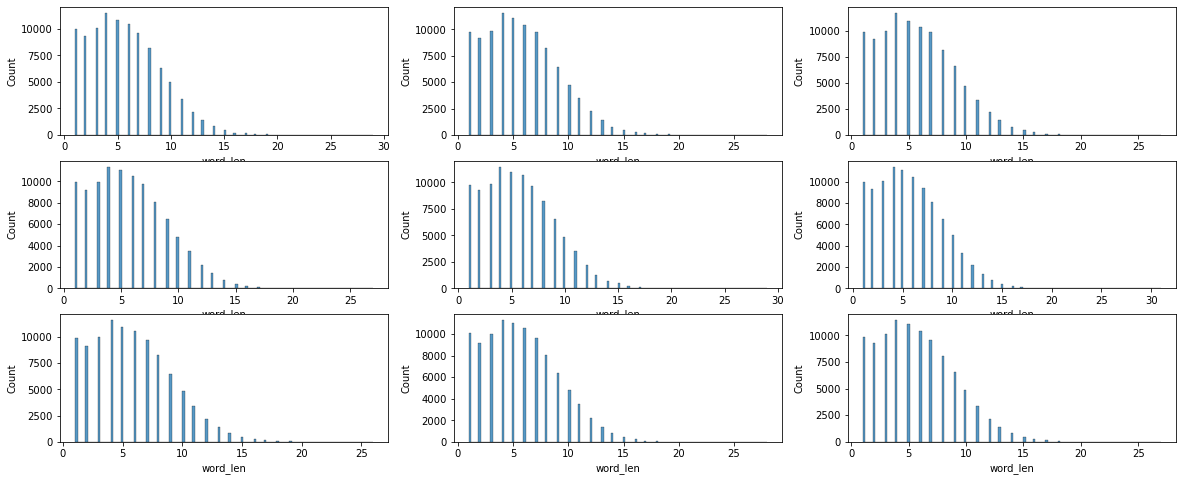

In [17]:
fig, axs = plt.subplots(3,3)
fig.tight_layout(pad=10.0)
fig.set_figheight(8)
fig.set_figwidth(20)

sns.histplot(data_from_s2r_word_1, ax =axs[0][0])
sns.histplot(data_from_s2r_word_2, ax =axs[0][1])
sns.histplot(data_from_s2r_word_3, ax =axs[0][2])
sns.histplot(data_from_s2r_word_4, ax =axs[1][0])
sns.histplot(data_from_s2r_word_5, ax =axs[1][1])
sns.histplot(data_from_s2r_word_6, ax =axs[1][2])
sns.histplot(data_from_s2r_word_7, ax =axs[2][0])
sns.histplot(data_from_s2r_word_8, ax =axs[2][1])
sns.histplot(data_from_s2r_word_9, ax =axs[2][2])


# Attempt to Plot without Sampling

<AxesSubplot:xlabel='word_len', ylabel='Count'>

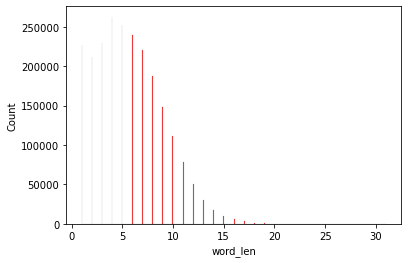

In [19]:
sns.histplot(data_from_s2r.word_len, color= 'red')

/home/karan.verma/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_len', ylabel='Density'>

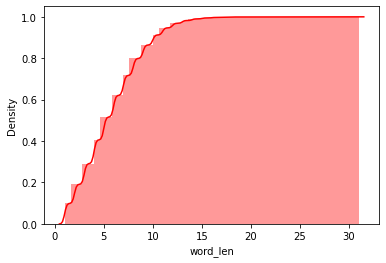

In [7]:
kwargs = {'cumulative': True}
sns.distplot(data_from_s2r.word_len, color= 'red', hist_kws=kwargs, kde_kws=kwargs)